In [1]:
import numpy as np
import matplotlib.pyplot as plt
import kiauhoku as kh
import numba.np.unsafe.ndarray 
import pandas as pd
import PartIII
import PartII

In [2]:
cluster = PartII.get_cluster_table("NGC 2682", verbose=True)
print('Number of cluster stars:', len(cluster))
table = cluster[cluster['err'] == 0]
print('Number of cluster stars that fit well to a model grid:', len(table))
table = table[abs(table['RV_PROB']) > 0]
table = table[abs(table['FEH_PROB']) > 0]
table = table[abs(table['CG_PROB']) > 0]
table = table[abs(table['PM_PROB']) > 0]
print('Number of stars with all probabilities > 0:', len(table))
logg_limit = 4.5
cleaned_cluster = table[table['LOGG'] < logg_limit]
print('Number of stars with logg < 4.5:', len(cleaned_cluster))

NGC 2682 has a pre-made table, nice!
Number of cluster stars: 2420
Number of cluster stars that fit well to a model grid: 2011
Number of stars with all probabilities > 0: 1148
Number of stars with logg < 4.5: 564


In [3]:
M67 = cleaned_cluster
met = (M67['M_H'].mean())
realmet = 0
print(met, realmet)

# Although the OCCAM average is slightly higher, we will use the accepted M67 metallicity of 0

0.0023133124 0


In [6]:
masses_4gyr = np.linspace(.63,1.368,1000)
masses_5gyr = np.linspace(.63,1.272,1000)
masses_6gyr = np.linspace(.63,1.2081,1000)

modelD4 = (PartIII.dart_iso(4, realmet, masses_4gyr, verbose=True).T).sort_values(by=["logg"], ascending=False)
modelD5 = (PartIII.dart_iso(5, realmet, masses_5gyr, verbose=True).T).sort_values(by=["logg"], ascending=False)
modelD6 = (PartIII.dart_iso(6, realmet, masses_6gyr, verbose=True).T).sort_values(by=["logg"], ascending=False)

modelD4.to_csv("isochrones/DSEP4_FEH=0")
modelD5.to_csv("isochrones/DSEP5_FEH=0")
modelD6.to_csv("isochrones/DSEP6_FEH=0")

0.63
Fitting star with dart...
dart: success!
0.6307387387387388
Fitting star with dart...
dart: success!
0.6314774774774775
Fitting star with dart...
dart: success!
0.6322162162162163
Fitting star with dart...
dart: success!
0.6329549549549549
Fitting star with dart...
dart: success!
0.6336936936936937
Fitting star with dart...
dart: success!
0.6344324324324324
Fitting star with dart...
dart: success!
0.6351711711711712
Fitting star with dart...
dart: success!
0.6359099099099099
Fitting star with dart...
dart: success!
0.6366486486486487
Fitting star with dart...
dart: success!
0.6373873873873874
Fitting star with dart...
dart: success!
0.6381261261261262
Fitting star with dart...
dart: success!
0.6388648648648648
Fitting star with dart...
dart: success!
0.6396036036036036
Fitting star with dart...
dart: success!
0.6403423423423423
Fitting star with dart...
dart: success!
0.6410810810810811
Fitting star with dart...
dart: success!
0.6418198198198198
Fitting star with dart...
dart: suc

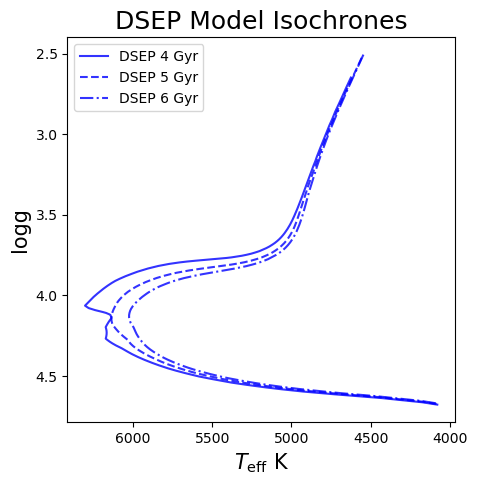

In [8]:
f, ax = plt.subplots(1, 1, figsize=(5,5))
ax.set_title('DSEP Kiel Diagram')

teffsD4 = np.array(modelD4["teff"])
loggsD4 = np.array(modelD4["logg"])
ax.plot(teffsD4,loggsD4, '-', alpha=.8, color='tab:green', label='DSEP 4 Gyr')

teffsD5 = np.array(modelD5["teff"])
loggsD5 = np.array(modelD5["logg"])
ax.plot(teffsD5,loggsD5, '--', alpha=.8, color='tab:green', label='DSEP 5 Gyr')

teffsD6 = np.array(modelD6["teff"])
loggsD6 = np.array(modelD6["logg"])
ax.plot(teffsD6,loggsD6, '-.', alpha=.8, color='tab:green', label='DSEP 6 Gyr')


ax.set_xlabel(r"$T_\mathrm{eff}$ K", fontsize=15)
ax.set_ylabel(r"logg", fontsize=15)
ax.invert_yaxis()
ax.set_title(r'DSEP Isochrones', fontsize=18)
plt.legend()
ax.invert_xaxis()

In [27]:
masses_4gyr = np.linspace(.63,1.341,1000)
masses_5gyr = np.linspace(.63,1.257,1000)
masses_6gyr = np.linspace(.63,1.192,1000)

modelM4 = (PartIII.mist_iso(4, realmet, masses_4gyr, verbose=True).T).sort_values(by=["logg"], ascending=False)
modelM5 = (PartIII.mist_iso(5, realmet, masses_5gyr, verbose=True).T).sort_values(by=["logg"], ascending=False)
modelM6 = (PartIII.mist_iso(6, realmet, masses_6gyr, verbose=True).T).sort_values(by=["logg"], ascending=False)

modelM4.to_csv("isochrones/MIST4_FEH=0")
modelM5.to_csv("isochrones/MIST5_FEH=0")
modelM6.to_csv("isochrones/MIST6_FEH=0")

0.63
Fitting star with mist...
mist: success!
0.6307117117117117
Fitting star with mist...
mist: success!
0.6314234234234234
Fitting star with mist...
mist: success!
0.6321351351351351
Fitting star with mist...
mist: success!
0.6328468468468469
Fitting star with mist...
mist: success!
0.6335585585585586
Fitting star with mist...
mist: success!
0.6342702702702703
Fitting star with mist...
mist: success!
0.634981981981982
Fitting star with mist...
mist: success!
0.6356936936936937
Fitting star with mist...
mist: success!
0.6364054054054054
Fitting star with mist...
mist: success!
0.6371171171171172
Fitting star with mist...
mist: success!
0.6378288288288289
Fitting star with mist...
mist: success!
0.6385405405405405
Fitting star with mist...
mist: success!
0.6392522522522522
Fitting star with mist...
mist: success!
0.6399639639639639
Fitting star with mist...
mist: success!
0.6406756756756756
Fitting star with mist...
mist: success!
0.6413873873873874
Fitting star with mist...
mist: succ

In [28]:
masses_4gyr = np.linspace(.63,1.371,1000)
masses_5gyr = np.linspace(.63,1.284,1000)
masses_6gyr = np.linspace(.63,1.221,1000)

modelY4 = (PartIII.yrec_iso(4, realmet, masses_4gyr, verbose=True).T).sort_values(by=["logg"], ascending=False)
modelY5 = (PartIII.yrec_iso(5, realmet, masses_5gyr, verbose=True).T).sort_values(by=["logg"], ascending=False)
modelY6 = (PartIII.yrec_iso(6, realmet, masses_6gyr, verbose=True).T).sort_values(by=["logg"], ascending=False)

modelY4.to_csv("isochrones/YREC4_FEH=0")
modelY5.to_csv("isochrones/YREC5_FEH=0")
modelY6.to_csv("isochrones/YREC6_FEH=0")

0.63
Fitting star with yrec...
yrec: success!
0.6307417417417418
Fitting star with yrec...
yrec: success!
0.6314834834834835
Fitting star with yrec...
yrec: success!
0.6322252252252253
Fitting star with yrec...
yrec: success!
0.632966966966967
Fitting star with yrec...
yrec: success!
0.6337087087087088
Fitting star with yrec...
yrec: success!
0.6344504504504505
Fitting star with yrec...
yrec: success!
0.6351921921921923
Fitting star with yrec...
yrec: success!
0.6359339339339339
Fitting star with yrec...
yrec: success!
0.6366756756756757
Fitting star with yrec...
yrec: success!
0.6374174174174174
Fitting star with yrec...
yrec: success!
0.6381591591591592
Fitting star with yrec...
yrec: success!
0.6389009009009009
Fitting star with yrec...
yrec: success!
0.6396426426426427
Fitting star with yrec...
yrec: success!
0.6403843843843844
Fitting star with yrec...
yrec: success!
0.6411261261261262
Fitting star with yrec...
yrec: success!
0.6418678678678679
Fitting star with yrec...
yrec: succ

In [30]:
masses_4gyr = np.linspace(.63,1.367,1000)
masses_5gyr = np.linspace(.63,1.279,1000)
masses_6gyr = np.linspace(.63,1.212,1000)

modelG4 = (PartIII.gars_iso(4, realmet, masses_4gyr, verbose=True).T).sort_values(by=["logg"], ascending=False)
modelG5 = (PartIII.gars_iso(5, realmet, masses_5gyr, verbose=True).T).sort_values(by=["logg"], ascending=False)
modelG6 = (PartIII.gars_iso(6, realmet, masses_6gyr, verbose=True).T).sort_values(by=["logg"], ascending=False)

modelG4.to_csv("isochrones/GARSTEC4_FEH=0")
modelG5.to_csv("isochrones/GARSTEC5_FEH=0")
modelG6.to_csv("isochrones/GARSTEC6_FEH=0")

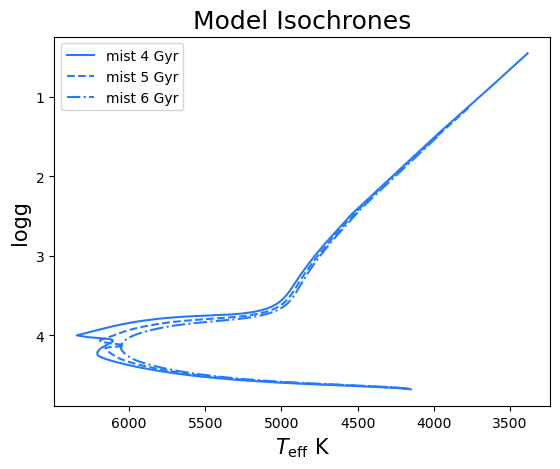

In [31]:
teffsM4 = np.array(modelM4["teff"])
loggsM4 = np.array(modelM4["logg"])  
teffsM5 = np.array(modelM5["teff"])
loggsM5 = np.array(modelM5["logg"])
teffsM6 = np.array(modelM6["teff"])
loggsM6 = np.array(modelM6["logg"])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(teffsM4,loggsM4, '-', color='b', label='mist 4 Gyr')
ax.plot(teffsM5,loggsM5, '--', color='b', label='mist 5 Gyr')
ax.plot(teffsM6,loggsM6, '-.', color='b', label='mist 6 Gyr')

ax.set_xlabel(r"$T_\mathrm{eff}$ K", fontsize=15)
ax.set_ylabel(r"logg", fontsize=15)
ax.invert_yaxis()
ax.set_title(r'Mist Isochrones', fontsize=18)
plt.legend()
ax.invert_xaxis()